In [1]:
import math
import pandas as pd
from functools import reduce
from graphviz import Digraph
import collections
# Дата сет
dataset = pd.read_csv('drinks.csv',
                    names=['name','redactor','smartphone','wine','OS','drink',])
df0=dataset.drop('name',axis=1)

In [2]:
# Генерируется массив, содержащий строку из следующих компонентов: ключ (k) и значение (v).
cstr = lambda s:[k+":"+str(v) for k,v in sorted(s.value_counts().items())]

In [3]:
# Структура данных Decision Tree
tree = {
    "name":df0.columns[-1],
#     +" "+str(cstr(df0.iloc[:,-1])),
    "df":df0,
    "edges":[],
}
# print(tree)
# Генерацию дерева, у узлов которого могут быть ветви, сохраняем в open
open = [tree]
entropy = lambda s:-reduce(lambda x,y:x+y,map(lambda x:(x/len(s))*math.log2(x/len(s)),s.value_counts()))


In [4]:
# dicti = {}
while(len(open)!=0):
    # Вытаскиваем из массива open первый элемент и данные, хранящиеся в этом узле
    n = open.pop(0)
    df_n = n["df"]
    if entropy(df_n.iloc[:,-1])==0:
        continue
    # Создаем переменную, в которую будем сохранять список значений атрибута с возможностью разветвления

    attrs = {}
    
    for attr in df_n.columns[:-1]:
        attrs[attr] = {"entropy":0,"dfs":[],"values":[]}
        for value in sorted(set(df_n[attr])):
            # Фильтруем данные по значению атрибута и высчитываем энтропию, данные и значения, сохрнаяем
            df_m = df_n.query(attr+"=='"+value+"'")
            attrs[attr]["entropy"] += entropy(df_m.iloc[:,-1])*df_m.shape[0]/df_n.shape[0]
            attrs[attr]["dfs"] += [df_m]
            attrs[attr]["values"] += [value]
        pass
    pass
#     print(attrs)
#     print("\n----------\n")
#     dicti.update(attrs)
    # Прерываем исследование узла без атрибутов
    if len(attrs)==0:
        continue
    attr = min(attrs,key=lambda x:attrs[x]["entropy"])
    # Добавляем каждое значение разветвленного атрибута и данные, полученные после разветвления, в наше дерево и в open.
    for d,v in zip(attrs[attr]["dfs"],attrs[attr]["values"]):
        m = {"name":attr+"="+v,"edges":[],"df":d.drop(columns=attr)}
        n["edges"].append(m)
        open.append(m)


pass


In [18]:
print(df0,"\n-------------")
# print(open)
# print("\n-------------")
# print(attrs)
print(tree)

        redactor smartphone     wine       OS   drink
0        jupyter    android  nothing  windows  coffee
1        pyсharm     iphone  nothing  windows  coffee
2        pyсharm     iphone  nothing      mac     tea
3            vim    android    white    linux     tea
4   sublime_text     iphone  nothing    linux     tea
5        vs_code     iphone  nothing    linux     tea
6        vs_code    android    white      mac  coffee
7        vs_code     iphone  nothing      mac  coffee
8   sublime_text     iphone    white      mac     tea
9        pyсharm    android      red  windows  coffee
10           vim    android  nothing    linux     tea
11  sublime_text     iphone      red    linux  coffee
12       pyсharm     iphone      red      mac  coffee 
-------------
{'name': 'drink', 'df':         redactor smartphone     wine       OS   drink
0        jupyter    android  nothing  windows  coffee
1        pyсharm     iphone  nothing  windows  coffee
2        pyсharm     iphone  nothing      m

In [6]:
# Метод преобразования дерева в символы
def tstr(tree,indent=""):
    # Если этот узел является листовым узлом выводим частотное распределение последнего столбца данных df
    s = indent+tree["name"]+str(cstr(tree["df"].iloc[:,-1]) if len(tree["edges"])==0 else "")
    for e in tree["edges"]:
        s += tstr(e,indent+"  ")
        pass

    return s
# Выводим древо в его символьном представлении.
# print(tree)
s = tstr(tree)
print(s)


drink  OS=linux    wine=nothing['tea:3']    wine=red['coffee:1']    wine=white['tea:1']  OS=mac    redactor=pyсharm      wine=nothing['tea:1']      wine=red['coffee:1']    redactor=sublime_text['tea:1']    redactor=vs_code['coffee:2']  OS=windows['coffee:3']


# Визуализация


In [7]:
dot = Digraph(comment='ID3')

In [8]:
# def fill_visual_graph(dot, root):
#     """
#     Заполняем граф для отображения
#     """
#     dot.node(str(id(root)), root.value)
#     for node in root.childs:
#         dot.edge(str(id(root)), str(id(node)), node.edge)
#         fill_visual_graph(dot, node)




# def tstr(tree,indent=""):
#     # Если этот узел является листовым узлом выводим частотное распределение последнего столбца данных df
#     s = indent+tree["name"]+str(cstr(tree["df"].iloc[:,-1]) if len(tree["edges"])==0 else "")+"\n"
#     for e in tree["edges"]:
#         s += tstr(e,indent+"  ")
#         pass

#     return s

In [9]:
dot = Digraph(comment='ID3')

In [49]:
def fill_visual_graph(dot, tree):
    """
    Заполняем граф для отображения
    """
    dot.node(str(tree["name"]))
    for node in tree["edges"]:
        dot.edge(str(tree["name"]), str(node["name"]),str(node["name"].split('=')[1]))
        fill_visual_graph(dot, node)


In [50]:
dot = Digraph(comment='ID3')
print(dot)

// ID3
digraph {
}


In [51]:
fill_visual_graph(dot, tree)
print(dot)

// ID3
digraph {
	drink
	drink -> OS [label=linux]
	"OS=linux"
	"OS=linux" -> wine [label=nothing]
	"wine=nothing"
	"OS=linux" -> wine [label=red]
	"wine=red"
	"OS=linux" -> wine [label=white]
	"wine=white"
	drink -> OS [label=mac]
	"OS=mac"
	"OS=mac" -> redactor [label="pyсharm"]
	"redactor=pyсharm"
	"redactor=pyсharm" -> wine [label=nothing]
	"wine=nothing"
	"redactor=pyсharm" -> wine [label=red]
	"wine=red"
	"OS=mac" -> redactor [label=sublime_text]
	"redactor=sublime_text"
	"OS=mac" -> redactor [label=vs_code]
	"redactor=vs_code"
	drink -> OS [label=windows]
	"OS=windows"
}


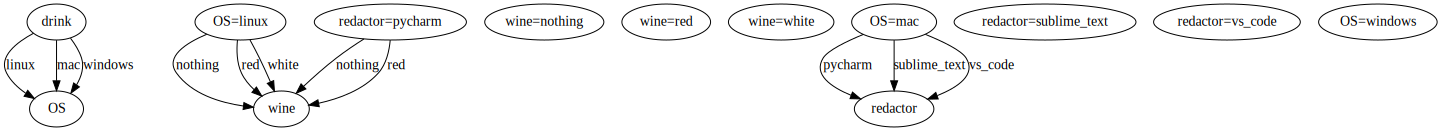

In [52]:
dot